In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
# 1) Clone your repo and cd into it
REPO_URL = "https://github.com/kasundi2002/Deep-Learning-Project.git"  # <-- put your repo URL
!git clone {REPO_URL}
repo_dir = REPO_URL.rsplit("/", 1)[-1].replace(".git", "")
%cd /content/{repo_dir}

# 2) Fetch all branches
!git fetch --all --prune
!git branch -a  # (optional) see branches

# 3) Checkout the existing 'sathmi' branch
!git switch sathmi || git switch -c sathmi --track origin/sathmi

# 4) Set your Git identity
!git config user.name "sathmi"
!git config user.email "sathmi@users.noreply.github.com"  # replace if you prefer another email

# 5) Confirm
!git status
!git branch --show-current


Cloning into 'Deep-Learning-Project'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 34 (delta 11), reused 26 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 23.90 KiB | 5.97 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/Deep-Learning-Project
Fetching origin
* main
  remotes/origin/HEAD -> origin/main
  remotes/origin/devmi
  remotes/origin/kasundi
  remotes/origin/main
  remotes/origin/mihiduni
  remotes/origin/sathmi
Branch 'sathmi' set up to track remote branch 'sathmi' from 'origin'.
Switched to a new branch 'sathmi'
On branch sathmi
Your branch is up to date with 'origin/sathmi'.

nothing to commit, working tree clean
sathmi


In [2]:
!nvidia-smi

import tensorflow as tf, numpy as np, random, os
print("TF version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices("GPU"))

SEED = 42
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)
print("Seeds set.")


Tue Oct  7 08:08:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
# Install Kaggle CLI and authenticate
!pip -q install kaggle

from google.colab import files
uploaded = files.upload()  # This returns a dictionary of uploaded files

# Get the actual uploaded filename
uploaded_filename = list(uploaded.keys())[0]
print(f"Uploaded file: {uploaded_filename}")

!mkdir -p ~/.kaggle
!mv '{uploaded_filename}' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# sanity check
!kaggle --version


Saving kaggle (1).json to kaggle (1) (3).json
Uploaded file: kaggle (1) (3).json
Kaggle API 1.7.4.5


In [5]:
# Fix Kaggle CLI auth (handles missing/renamed kaggle.json)
import os, json, glob, shutil
from google.colab import files

os.makedirs("/root/.kaggle", exist_ok=True)
cfg_path = "/root/.kaggle/kaggle.json"

# If not already present, try to find or ask you to upload it
if not os.path.exists(cfg_path):
    candidates = glob.glob("/content/kaggle*.json")
    if not candidates:
        print("Please upload your kaggle.json")
        uploaded = files.upload()  # pick kaggle.json
        local = next(iter(uploaded.keys()))
    else:
        local = candidates[0]
    shutil.move(local, cfg_path)

# Lock down permissions
!chmod 600 /root/.kaggle/kaggle.json

# Export env vars so CLI definitely sees them
creds = json.load(open(cfg_path))
os.environ["KAGGLE_USERNAME"] = creds["username"]
os.environ["KAGGLE_KEY"] = creds["key"]
print("Kaggle configured for user:", creds["username"])
!kaggle --version


Please upload your kaggle.json


Saving kaggle (1).json to kaggle (1) (1).json
Kaggle configured for user: sathmigunawardane
Kaggle API 1.7.4.5


In [8]:
import os, glob, pandas as pd

DATA_DIR = "/content/data"

# Prefer the canonical (capitalized) dirs if both exist
img_dir_1 = os.path.join(DATA_DIR, "HAM10000_images_part_1") if os.path.isdir(os.path.join(DATA_DIR, "HAM10000_images_part_1")) else os.path.join(DATA_DIR, "ham10000_images_part_1")
img_dir_2 = os.path.join(DATA_DIR, "HAM10000_images_part_2") if os.path.isdir(os.path.join(DATA_DIR, "HAM10000_images_part_2")) else os.path.join(DATA_DIR, "ham10000_images_part_2")
meta_csv  = os.path.join(DATA_DIR, "HAM10000_metadata.csv")

print("IMG DIR 1:", img_dir_1, "exists:", os.path.isdir(img_dir_1))
print("IMG DIR 2:", img_dir_2, "exists:", os.path.isdir(img_dir_2))
print("META CSV :", meta_csv, "exists:", os.path.isfile(meta_csv))

# quick counts
n1 = len(glob.glob(os.path.join(img_dir_1, "*.jpg")))
n2 = len(glob.glob(os.path.join(img_dir_2, "*.jpg")))
print(f"Images part1: {n1}, part2: {n2}, total: {n1+n2}")

# peek metadata
meta = pd.read_csv(meta_csv)
print("Metadata rows:", len(meta))
meta.head()


IMG DIR 1: /content/data/HAM10000_images_part_1 exists: True
IMG DIR 2: /content/data/HAM10000_images_part_2 exists: True
META CSV : /content/data/HAM10000_metadata.csv exists: True
Images part1: 5000, part2: 5015, total: 10015
Metadata rows: 10015


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
# Download + unzip to a fixed location
!mkdir -p /content/data
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p /content/data
!unzip -q /content/data/skin-cancer-mnist-ham10000.zip -d /content/data

# Quick sanity check
!ls -lah /content/data | head -n 20

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.18G/5.20G [02:33<00:02, 10.0MB/s]
100% 5.20G/5.20G [02:33<00:00, 36.3MB/s]
total 5.4G
drwxr-xr-x 6 root root 4.0K Oct  7 08:16 .
drwxr-xr-x 1 root root 4.0K Oct  7 08:10 ..
drwxr-xr-x 2 root root 156K Oct  7 08:16 ham10000_images_part_1
drwxr-xr-x 2 root root 156K Oct  7 08:15 HAM10000_images_part_1
drwxr-xr-x 2 root root 164K Oct  7 08:16 ham10000_images_part_2
drwxr-xr-x 2 root root 164K Oct  7 08:15 HAM10000_images_part_2
-rw-r--r-- 1 root root 551K Oct  6  2019 HAM10000_metadata.csv
-rw-r--r-- 1 root root  30M Oct  6  2019 hmnist_28_28_L.csv
-rw-r--r-- 1 root root  88M Oct  6  2019 hmnist_28_28_RGB.csv
-rw-r--r-- 1 root root 2.5M Oct  6  2019 hmnist_8_8_L.csv
-rw-r--r-- 1 root root 7.2M Oct  6  2019 hmnist_8_8_RGB.csv
-rw-r--r-- 1 root root 5.2G Oct  6  2019 skin-cancer-mnist-ham10000.zip


In [9]:
# from your repo root
!python members/run_mobilenet_v2.py -h


In [10]:
# make sure you're in the repo root
%cd /content/Deep-Learning-Project

# peek at the first ~120 lines to see argparse / expected flags
!sed -n '1,120p' members/run_mobilenet_v2.py




/content/Deep-Learning-Project
#Sathmi

In [11]:
%%writefile members/run_mobilenet_v2.py
#!/usr/bin/env python3
import argparse, os, glob
import pandas as pd

def find_data_dirs(data_dir: str):
    cap1 = os.path.join(data_dir, "HAM10000_images_part_1")
    low1 = os.path.join(data_dir, "ham10000_images_part_1")
    cap2 = os.path.join(data_dir, "HAM10000_images_part_2")
    low2 = os.path.join(data_dir, "ham10000_images_part_2")
    img_dir_1 = cap1 if os.path.isdir(cap1) else low1
    img_dir_2 = cap2 if os.path.isdir(cap2) else low2
    meta_csv  = os.path.join(data_dir, "HAM10000_metadata.csv")
    return img_dir_1, img_dir_2, meta_csv

def main():
    ap = argparse.ArgumentParser(description="MobileNetV2 runner (HAM10000) — path sanity check")
    ap.add_argument("--data_dir", required=True, help="Folder with HAM10000 files")
    ap.add_argument("--dry_run", action="store_true", help="Only verify paths and exit")
    args = ap.parse_args()

    img1, img2, meta = find_data_dirs(args.data_dir)

    assert os.path.isdir(img1), f"Images part_1 not found: {img1}"
    assert os.path.isdir(img2), f"Images part_2 not found: {img2}"
    assert os.path.isfile(meta), f"Metadata CSV not found: {meta}"

    n1 = len(glob.glob(os.path.join(img1, "*.jpg")))
    n2 = len(glob.glob(os.path.join(img2, "*.jpg")))

    print(f"[OK] Metadata: {meta}")
    print(f"[OK] Images: part1={img1} ({n1}), part2={img2} ({n2}), total={n1+n2}")

    if args.dry_run:
        print("[OK] Dry run complete.")
        return

if __name__ == "__main__":
    main()


Overwriting members/run_mobilenet_v2.py


In [12]:
%cd /content/Deep-Learning-Project
!python members/run_mobilenet_v2.py --data_dir /content/data --dry_run


/content/Deep-Learning-Project
[OK] Metadata: /content/data/HAM10000_metadata.csv
[OK] Images: part1=/content/data/HAM10000_images_part_1 (5000), part2=/content/data/HAM10000_images_part_2 (5015), total=10015
[OK] Dry run complete.


In [13]:
%%writefile -a members/run_mobilenet_v2.py
# --- Split HAM10000 into train/val/test and save CSVs ---
def make_splits(data_dir, seed=42, test_size=0.15, val_size=0.15):
    import os, glob, json
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import GroupShuffleSplit
    from sklearn.utils.class_weight import compute_class_weight

    # read metadata
    meta_csv = os.path.join(data_dir, "HAM10000_metadata.csv")
    meta = pd.read_csv(meta_csv)

    # map image_id -> absolute filepath
    img1, img2, _ = find_data_dirs(data_dir)
    id2path = {}
    for d in (img1, img2):
        for p in glob.glob(os.path.join(d, "*.jpg")):
            id2path[os.path.splitext(os.path.basename(p))[0]] = p

    meta = meta[meta["image_id"].isin(id2path)].copy()
    meta["filepath"] = meta["image_id"].map(id2path)

    # labels
    classes = sorted(meta["dx"].unique())
    class2idx = {c: i for i, c in enumerate(classes)}
    meta["label_idx"] = meta["dx"].map(class2idx)

    # grouped split to avoid near-duplicates across splits
    groups = meta["lesion_id"].fillna(meta["image_id"])
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    train_idx, test_idx = next(gss.split(meta, groups=groups))
    train = meta.iloc[train_idx].reset_index(drop=True)
    test  = meta.iloc[test_idx].reset_index(drop=True)

    groups_train = train["lesion_id"].fillna(train["image_id"])
    gss2 = GroupShuffleSplit(n_splits=1, test_size=val_size, random_state=seed)
    tr_idx, val_idx = next(gss2.split(train, groups=groups_train))
    train = train.iloc[tr_idx].reset_index(drop=True)
    val   = train.iloc[val_idx].reset_index(drop=True) if False else meta.iloc[val_idx].reset_index(drop=True)  # safety

    # class weights for imbalanced classes
    cw = compute_class_weight("balanced", classes=np.arange(len(classes)), y=train["label_idx"])
    class_weights = {int(i): float(w) for i, w in enumerate(cw)}

    # save artifacts
    os.makedirs("results", exist_ok=True)
    train.to_csv("results/m3_train_split.csv", index=False)
    val.to_csv("results/m3_val_split.csv", index=False)
    test.to_csv("results/m3_test_split.csv", index=False)
    with open("results/m3_meta.json", "w") as f:
        json.dump({"classes": classes, "class2idx": class2idx, "class_weights": class_weights}, f, indent=2)
asses, class_weights

# extend CLI
if __name__ == "__main__":  # add after previous main definition
    pass


Appending to members/run_mobilenet_v2.py


In [24]:
%cd /content/Deep-Learning-Project
!python members/run_mobilenet_v2.py --data_dir /content/data --prepare_split
!ls -lh results


/content/Deep-Learning-Project
2025-10-07 08:33:06.529287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759825986.548870    7046 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759825986.554786    7046 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759825986.569900    7046 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759825986.569930    7046 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759825986.569934    7046 computation_placer

In [25]:
%%writefile members/run_mobilenet_v2.py
#!/usr/bin/env python3
import argparse, os, glob, json
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# ---------------- paths & splits ----------------
def find_data_dirs(data_dir: str):
    cap1 = os.path.join(data_dir, "HAM10000_images_part_1")
    low1 = os.path.join(data_dir, "ham10000_images_part_1")
    cap2 = os.path.join(data_dir, "HAM10000_images_part_2")
    low2 = os.path.join(data_dir, "ham10000_images_part_2")
    img_dir_1 = cap1 if os.path.isdir(cap1) else low1
    img_dir_2 = cap2 if os.path.isdir(cap2) else low2
    meta_csv  = os.path.join(data_dir, "HAM10000_metadata.csv")
    return img_dir_1, img_dir_2, meta_csv

def make_splits(data_dir, seed=42, test_size=0.15, val_size=0.15):
    meta_csv = os.path.join(data_dir, "HAM10000_metadata.csv")
    meta = pd.read_csv(meta_csv)

    img1, img2, _ = find_data_dirs(data_dir)
    id2path = {}
    for d in (img1, img2):
        for p in glob.glob(os.path.join(d, "*.jpg")):
            id2path[os.path.splitext(os.path.basename(p))[0]] = p

    meta = meta[meta["image_id"].isin(id2path)].copy()
    meta["filepath"] = meta["image_id"].map(id2path)

    classes = sorted(meta["dx"].unique())
    class2idx = {c:i for i,c in enumerate(classes)}
    meta["label_idx"] = meta["dx"].map(class2idx)

    groups = meta["lesion_id"].fillna(meta["image_id"])
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    train_idx, test_idx = next(gss.split(meta, groups=groups))
    train_full = meta.iloc[train_idx].reset_index(drop=True)
    test = meta.iloc[test_idx].reset_index(drop=True)

    gss2 = GroupShuffleSplit(n_splits=1, test_size=val_size, random_state=seed)
    groups_train = train_full["lesion_id"].fillna(train_full["image_id"])
    tr_idx, val_idx = next(gss2.split(train_full, groups=groups_train))
    train = train_full.iloc[tr_idx].reset_index(drop=True)
    val   = train_full.iloc[val_idx].reset_index(drop=True)

    cw = compute_class_weight(class_weight="balanced",
                              classes=np.arange(len(classes)),
                              y=train["label_idx"])
    class_weights = {int(i): float(w) for i,w in enumerate(cw)}

    os.makedirs("results", exist_ok=True)
    train.to_csv("results/m3_train_split.csv", index=False)
    val.to_csv("results/m3_val_split.csv", index=False)
    test.to_csv("results/m3_test_split.csv", index=False)
    with open("results/m3_meta.json","w") as f:
        json.dump({"classes": classes,
                   "class2idx": class2idx,
                   "class_weights": class_weights}, f, indent=2)
    return train, val, test, classes, class_weights

def load_splits_and_meta():
    train = pd.read_csv("results/m3_train_split.csv")
    val   = pd.read_csv("results/m3_val_split.csv")
    test  = pd.read_csv("results/m3_test_split.csv")
    with open("results/m3_meta.json") as f:
        meta = json.load(f)
    classes = meta["classes"]
    class_weights = {int(k): float(v) for k,v in meta["class_weights"].items()}
    return train, val, test, classes, class_weights

# ---------------- tf.data pipeline ----------------
IMG_SIZE = 224
AUTOTUNE = tf.data.AUTOTUNE

AUG_STRONG = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),   # stronger aug for MobileNetV2
], name="aug_strong")

def _decode(path, label_idx, num_classes):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32)  # keep 0..255; will use MobileNetV2 preprocess in the model
    label = tf.one_hot(label_idx, depth=num_classes)
    return img, label

def make_dataset(df, num_classes, training=True, batch_size=32, strong_aug=True):
    ds = tf.data.Dataset.from_tensor_slices((df["filepath"].values, df["label_idx"].values))
    if training:
        ds = ds.shuffle(len(df), seed=42)
    ds = ds.map(lambda p,l: _decode(p,l,num_classes), num_parallel_calls=AUTOTUNE)
    if training and strong_aug:
        ds = ds.map(lambda x,y: (AUG_STRONG(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

# ---------------- CLI ----------------
def main():
    ap = argparse.ArgumentParser(description="MobileNetV2 runner (HAM10000)")
    ap.add_argument("--data_dir", required=True, help="Folder with HAM10000 files")
    ap.add_argument("--dry_run", action="store_true", help="Only verify paths and exit")
    ap.add_argument("--prepare_split", action="store_true", help="Create train/val/test CSVs and exit")
    ap.add_argument("--ds_check", action="store_true", help="Build tf.data and print one batch shape")
    ap.add_argument("--batch_size", type=int, default=32)
    args = ap.parse_args()

    img1, img2, meta = find_data_dirs(args.data_dir)
    if not (os.path.isdir(img1) and os.path.isdir(img2) and os.path.isfile(meta)):
        raise SystemExit(f"[ERR] Dataset paths missing.\nimg1={img1}\nimg2={img2}\nmeta={meta}")

    if args.dry_run:
        n1 = len(glob.glob(os.path.join(img1, "*.jpg")))
        n2 = len(glob.glob(os.path.join(img2, "*.jpg")))
        print(f"[OK] Metadata: {meta}")
        print(f"[OK] Images: part1={img1} ({n1}), part2={img2} ({n2}), total={n1+n2}")
        print("[OK] Dry run complete.")
        return

    if args.prepare_split:
        train, val, test, classes, class_weights = make_splits(args.data_dir)
        print(f"[OK] Saved splits → results/: train={len(train)}, val={len(val)}, test={len(test)}")
        print(f"[OK] Classes: {classes}")
        print(f"[OK] Class weights: {class_weights}")
        return

    if args.ds_check:
        train, val, test, classes, class_weights = load_splits_and_meta()
        print(f"[OK] Loaded splits: train={len(train)}, val={len(val)}, test={len(test)}")
        print(f"[OK] Classes: {classes}")
        tr_ds = make_dataset(train, num_classes=len(classes), training=True, batch_size=args.batch_size, strong_aug=True)
        for xb, yb in tr_ds.take(1):
            print("[OK] One batch shapes:", xb.shape, yb.shape)
        return

if __name__ == "__main__":
    main()


Overwriting members/run_mobilenet_v2.py


In [26]:
%cd /content/Deep-Learning-Project
!python members/run_mobilenet_v2.py --data_dir /content/data --ds_check --batch_size 32


/content/Deep-Learning-Project
2025-10-07 08:33:42.816438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759826022.835766    7217 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759826022.841826    7217 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759826022.856280    7217 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759826022.856307    7217 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759826022.856311    7217 computation_placer

In [27]:
%%writefile members/run_mobilenet_v2.py
#!/usr/bin/env python3
import argparse, os, glob, json
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# ---------------- paths & splits ----------------
def find_data_dirs(data_dir: str):
    cap1 = os.path.join(data_dir, "HAM10000_images_part_1")
    low1 = os.path.join(data_dir, "ham10000_images_part_1")
    cap2 = os.path.join(data_dir, "HAM10000_images_part_2")
    low2 = os.path.join(data_dir, "ham10000_images_part_2")
    img_dir_1 = cap1 if os.path.isdir(cap1) else low1
    img_dir_2 = cap2 if os.path.isdir(cap2) else low2
    meta_csv  = os.path.join(data_dir, "HAM10000_metadata.csv")
    return img_dir_1, img_dir_2, meta_csv

def make_splits(data_dir, seed=42, test_size=0.15, val_size=0.15):
    meta_csv = os.path.join(data_dir, "HAM10000_metadata.csv")
    meta = pd.read_csv(meta_csv)

    img1, img2, _ = find_data_dirs(data_dir)
    id2path = {}
    for d in (img1, img2):
        for p in glob.glob(os.path.join(d, "*.jpg")):
            id2path[os.path.splitext(os.path.basename(p))[0]] = p

    meta = meta[meta["image_id"].isin(id2path)].copy()
    meta["filepath"] = meta["image_id"].map(id2path)

    classes = sorted(meta["dx"].unique())
    class2idx = {c:i for i,c in enumerate(classes)}
    meta["label_idx"] = meta["dx"].map(class2idx)

    groups = meta["lesion_id"].fillna(meta["image_id"])
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    train_idx, test_idx = next(gss.split(meta, groups=groups))
    train_full = meta.iloc[train_idx].reset_index(drop=True)
    test = meta.iloc[test_idx].reset_index(drop=True)

    gss2 = GroupShuffleSplit(n_splits=1, test_size=val_size, random_state=seed)
    groups_train = train_full["lesion_id"].fillna(train_full["image_id"])
    tr_idx, val_idx = next(gss2.split(train_full, groups=groups_train))
    train = train_full.iloc[tr_idx].reset_index(drop=True)
    val   = train_full.iloc[val_idx].reset_index_drop=True if False else train_full.iloc[val_idx].reset_index(drop=True)

    cw = compute_class_weight(class_weight="balanced",
                              classes=np.arange(len(classes)),
                              y=train["label_idx"])
    class_weights = {int(i): float(w) for i,w in enumerate(cw)}

    os.makedirs("results", exist_ok=True)
    train.to_csv("results/m3_train_split.csv", index=False)
    val.to_csv("results/m3_val_split.csv", index=False)
    test.to_csv("results/m3_test_split.csv", index=False)
    with open("results/m3_meta.json","w") as f:
        json.dump({"classes": classes,
                   "class2idx": class2idx,
                   "class_weights": class_weights}, f, indent=2)
    return train, val, test, classes, class_weights

def load_splits_and_meta():
    train = pd.read_csv("results/m3_train_split.csv")
    val   = pd.read_csv("results/m3_val_split.csv")
    test  = pd.read_csv("results/m3_test_split.csv")
    with open("results/m3_meta.json") as f:
        meta = json.load(f)
    classes = meta["classes"]
    class_weights = {int(k): float(v) for k,v in meta["class_weights"].items()}
    return train, val, test, classes, class_weights

# ---------------- tf.data pipeline ----------------
IMG_SIZE = 224
AUTOTUNE = tf.data.AUTOTUNE

AUG_STRONG = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),   # stronger aug for MobileNetV2
], name="aug_strong")

def _decode(path, label_idx, num_classes):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32)
    label = tf.one_hot(label_idx, depth=num_classes)
    return img, label

def make_dataset(df, num_classes, training=True, batch_size=32, strong_aug=True):
    ds = tf.data.Dataset.from_tensor_slices((df["filepath"].values, df["label_idx"].values))
    if training:
        ds = ds.shuffle(len(df), seed=42)
    ds = ds.map(lambda p,l: _decode(p,l,num_classes), num_parallel_calls=AUTOTUNE)
    if training and strong_aug:
        ds = ds.map(lambda x,y: (AUG_STRONG(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

# ---------------- model & training ----------------
def build_mobilenetv2(num_classes: int):
    base = MobileNetV2(include_top=False, weights="imagenet",
                       input_shape=(IMG_SIZE, IMG_SIZE, 3))
    inp = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
    x = preprocess_input(inp)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inp, out)
    return model, base

def train_mobilenetv2(data_dir, batch_size, epochs1, epochs2, unfreeze_last, lr1, lr2):
    train, val, test, classes, class_weights = load_splits_and_meta()
    tr = make_dataset(train, len(classes), training=True,  batch_size=batch_size, strong_aug=True)
    va = make_dataset(val,   len(classes), training=False, batch_size=batch_size, strong_aug=False)

    model, base = build_mobilenetv2(len(classes))

    # Stage 1 — freeze backbone
    base.trainable = False
    model.compile(optimizer=tf.keras.optimizers.Adam(lr1),
                  loss="categorical_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])
    os.makedirs("weights", exist_ok=True)
    cbs1 = [
        tf.keras.callbacks.ModelCheckpoint("weights/m3_best_stage1.keras", monitor="val_accuracy", save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
    hist1 = model.fit(tr, validation_data=va, epochs=epochs1, class_weight=class_weights, callbacks=cbs1)

    # Stage 2 — unfreeze last N layers
    base.trainable = True
    for layer in base.layers[:-unfreeze_last]:
        layer.trainable = False
    model.compile(optimizer=tf.keras.optimizers.Adam(lr2),
                  loss="categorical_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])
    cbs2 = [
        tf.keras.callbacks.ModelCheckpoint("weights/m3_best_stage2.keras", monitor="val_accuracy", save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.2, min_lr=1e-6),
        tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
    ]
    hist2 = model.fit(tr, validation_data=va, epochs=epochs2, class_weight=class_weights, callbacks=cbs2)

    # Save final model + history
    model.save("weights/m3_mobilenetv2_final.keras")
    with open("results/m3_train_history.json","w") as f:
        json.dump({"stage1": hist1.history, "stage2": hist2.history}, f)

    print("[OK] Training completed. Best weights saved under weights/.")

# ---------------- CLI ----------------
def main():
    ap = argparse.ArgumentParser(description="MobileNetV2 runner (HAM10000)")
    ap.add_argument("--data_dir", required=True, help="Folder with HAM10000 files")
    ap.add_argument("--dry_run", action="store_true", help="Only verify paths and exit")
    ap.add_argument("--prepare_split", action="store_true", help="Create train/val/test CSVs and exit")
    ap.add_argument("--ds_check", action="store_true", help="Build tf.data and print one batch shape")
    ap.add_argument("--train", action="store_true", help="Train MobileNetV2 (2-stage)")
    ap.add_argument("--batch_size", type=int, default=32)
    ap.add_argument("--epochs1", type=int, default=10)
    ap.add_argument("--epochs2", type=int, default=10)
    ap.add_argument("--unfreeze_last", type=int, default=20)
    ap.add_argument("--lr1", type=float, default=1e-3)
    ap.add_argument("--lr2", type=float, default=1e-4)
    args = ap.parse_args()

    img1, img2, meta = find_data_dirs(args.data_dir)
    if not (os.path.isdir(img1) and os.path.isdir(img2) and os.path.isfile(meta)):
        raise SystemExit(f"[ERR] Dataset paths missing.\nimg1={img1}\nimg2={img2}\nmeta={meta}")

    if args.dry_run:
        n1 = len(glob.glob(os.path.join(img1, "*.jpg")))
        n2 = len(glob.glob(os.path.join(img2, "*.jpg")))
        print(f"[OK] Metadata: {meta}")
        print(f"[OK] Images: part1={img1} ({n1}), part2={img2} ({n2}), total={n1+n2}")
        print("[OK] Dry run complete.")
        return

    if args.prepare_split:
        train, val, test, classes, class_weights = make_splits(args.data_dir)
        print(f"[OK] Saved splits → results/: train={len(train)}, val={len(val)}, test={len(test)}")
        print(f"[OK] Classes: {classes}")
        print(f"[OK] Class weights: {class_weights}")
        return

    if args.ds_check:
        train, val, test, classes, class_weights = load_splits_and_meta()
        print(f"[OK] Loaded splits: train={len(train)}, val={len(val)}, test={len(test)}")
        print(f"[OK] Classes: {classes}")
        tr_ds = make_dataset(train, num_classes=len(classes), training=True, batch_size=args.batch_size, strong_aug=True)
        for xb, yb in tr_ds.take(1):
            print("[OK] One batch shapes:", xb.shape, yb.shape)
        return

    if args.train:
        train_mobilenetv2(args.data_dir, args.batch_size, args.epochs1, args.epochs2, args.unfreeze_last, args.lr1, args.lr2)
        return

if __name__ == "__main__":
    main()


Overwriting members/run_mobilenet_v2.py


In [28]:
%cd /content/Deep-Learning-Project
!python members/run_mobilenet_v2.py \
  --data_dir /content/data \
  --train \
  --batch_size 32 \
  --epochs1 3 \
  --epochs2 3 \
  --unfreeze_last 20 \
  --lr1 1e-3 \
  --lr2 1e-4


/content/Deep-Learning-Project
2025-10-07 08:34:04.340750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759826044.360399    7362 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759826044.366305    7362 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759826044.381028    7362 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759826044.381060    7362 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759826044.381064    7362 computation_placer

In [29]:
%%writefile members/run_mobilenet_v2.py
#!/usr/bin/env python3
import argparse, os, glob, json
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# ---------------- paths & splits ----------------
def find_data_dirs(data_dir: str):
    cap1 = os.path.join(data_dir, "HAM10000_images_part_1")
    low1 = os.path.join(data_dir, "ham10000_images_part_1")
    cap2 = os.path.join(data_dir, "HAM10000_images_part_2")
    low2 = os.path.join(data_dir, "ham10000_images_part_2")
    img_dir_1 = cap1 if os.path.isdir(cap1) else low1
    img_dir_2 = cap2 if os.path.isdir(cap2) else low2
    meta_csv  = os.path.join(data_dir, "HAM10000_metadata.csv")
    return img_dir_1, img_dir_2, meta_csv

def make_splits(data_dir, seed=42, test_size=0.15, val_size=0.15):
    meta_csv = os.path.join(data_dir, "HAM10000_metadata.csv")
    meta = pd.read_csv(meta_csv)

    img1, img2, _ = find_data_dirs(data_dir)
    id2path = {}
    for d in (img1, img2):
        for p in glob.glob(os.path.join(d, "*.jpg")):
            id2path[os.path.splitext(os.path.basename(p))[0]] = p

    meta = meta[meta["image_id"].isin(id2path)].copy()
    meta["filepath"] = meta["image_id"].map(id2path)

    classes = sorted(meta["dx"].unique())
    class2idx = {c:i for i,c in enumerate(classes)}
    meta["label_idx"] = meta["dx"].map(class2idx)

    groups = meta["lesion_id"].fillna(meta["image_id"])
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    train_idx, test_idx = next(gss.split(meta, groups=groups))
    train_full = meta.iloc[train_idx].reset_index(drop=True)
    test = meta.iloc[test_idx].reset_index(drop=True)

    gss2 = GroupShuffleSplit(n_splits=1, test_size=val_size, random_state=seed)
    groups_train = train_full["lesion_id"].fillna(train_full["image_id"])
    tr_idx, val_idx = next(gss2.split(train_full, groups=groups_train))
    train = train_full.iloc[tr_idx].reset_index(drop=True)
    val   = train_full.iloc[val_idx].reset_index(drop=True)

    cw = compute_class_weight(class_weight="balanced",
                              classes=np.arange(len(classes)),
                              y=train["label_idx"])
    class_weights = {int(i): float(w) for i,w in enumerate(cw)}

    os.makedirs("results", exist_ok=True)
    train.to_csv("results/m3_train_split.csv", index=False)
    val.to_csv("results/m3_val_split.csv", index=False)
    test.to_csv("results/m3_test_split.csv", index=False)
    with open("results/m3_meta.json","w") as f:
        json.dump({"classes": classes,
                   "class2idx": class2idx,
                   "class_weights": class_weights}, f, indent=2)
    return train, val, test, classes, class_weights

def load_splits_and_meta():
    train = pd.read_csv("results/m3_train_split.csv")
    val   = pd.read_csv("results/m3_val_split.csv")
    test  = pd.read_csv("results/m3_test_split.csv")
    with open("results/m3_meta.json") as f:
        meta = json.load(f)
    classes = meta["classes"]
    class_weights = {int(k): float(v) for k,v in meta["class_weights"].items()}
    return train, val, test, classes, class_weights

# ---------------- tf.data pipeline ----------------
IMG_SIZE = 224
AUTOTUNE = tf.data.AUTOTUNE

AUG_STRONG = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),   # stronger aug for MobileNetV2
], name="aug_strong")

def _decode(path, label_idx, num_classes):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32)
    label = tf.one_hot(label_idx, depth=num_classes)
    return img, label

def make_dataset(df, num_classes, training=True, batch_size=32, strong_aug=True):
    ds = tf.data.Dataset.from_tensor_slices((df["filepath"].values, df["label_idx"].values))
    if training:
        ds = ds.shuffle(len(df), seed=42)
    ds = ds.map(lambda p,l: _decode(p,l,num_classes), num_parallel_calls=AUTOTUNE)
    if training and strong_aug:
        ds = ds.map(lambda x,y: (AUG_STRONG(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

# ---------------- model & training ----------------
def build_mobilenetv2(num_classes: int):
    base = MobileNetV2(include_top=False, weights="imagenet",
                       input_shape=(IMG_SIZE, IMG_SIZE, 3))
    inp = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
    x = preprocess_input(inp)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inp, out)
    return model, base

def train_mobilenetv2(data_dir, batch_size, epochs1, epochs2, unfreeze_last, lr1, lr2):
    train, val, test, classes, class_weights = load_splits_and_meta()
    tr = make_dataset(train, len(classes), training=True,  batch_size=batch_size, strong_aug=True)
    va = make_dataset(val,   len(classes), training=False, batch_size=batch_size, strong_aug=False)

    model, base = build_mobilenetv2(len(classes))

    # Stage 1 — freeze backbone
    base.trainable = False
    model.compile(optimizer=tf.keras.optimizers.Adam(lr1),
                  loss="categorical_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])
    os.makedirs("weights", exist_ok=True)
    cbs1 = [
        tf.keras.callbacks.ModelCheckpoint("weights/m3_best_stage1.keras", monitor="val_accuracy", save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
    hist1 = model.fit(tr, validation_data=va, epochs=epochs1, class_weight=class_weights, callbacks=cbs1)

    # Stage 2 — unfreeze last N layers
    base.trainable = True
    for layer in base.layers[:-unfreeze_last]:
        layer.trainable = False
    model.compile(optimizer=tf.keras.optimizers.Adam(lr2),
                  loss="categorical_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])
    cbs2 = [
        tf.keras.callbacks.ModelCheckpoint("weights/m3_best_stage2.keras", monitor="val_accuracy", save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.2, min_lr=1e-6),
        tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
    ]
    hist2 = model.fit(tr, validation_data=va, epochs=epochs2, class_weight=class_weights, callbacks=cbs2)

    # Save final model + history
    model.save("weights/m3_mobilenetv2_final.keras")
    with open("results/m3_train_history.json","w") as f:
        json.dump({"stage1": hist1.history, "stage2": hist2.history}, f)

    print("[OK] Training completed. Best weights saved under weights/.")

# ---------------- evaluation ----------------
def evaluate_mobilenetv2(batch_size):
    train, val, test, classes, _ = load_splits_and_meta()
    te = make_dataset(test, len(classes), training=False, batch_size=batch_size, strong_aug=False)

    model, _ = build_mobilenetv2(len(classes))
    # pick best weights available
    ckpts = ["weights/m3_best_stage2.keras", "weights/m3_best_stage1.keras", "weights/m3_mobilenetv2_final.keras"]
    ckpt = next((p for p in ckpts if os.path.exists(p)), None)
    if not ckpt:
        raise SystemExit("[ERR] No weights found. Train first.")
    model.load_weights(ckpt)
    print(f"[OK] Loaded weights: {ckpt}")

    probs = model.predict(te, verbose=0)
    y_pred = probs.argmax(1)
    y_true = test["label_idx"].values

    report = classification_report(y_true, y_pred, target_names=classes, digits=4, output_dict=True)
    # print nicely
    print(json.dumps(report, indent=2))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(classes))))
    os.makedirs("results", exist_ok=True)
    plt.figure(figsize=(7,6))
    plt.imshow(cm, interpolation="nearest")
    plt.title("Confusion Matrix — MobileNetV2 on HAM10000")
    plt.xticks(range(len(classes)), classes, rotation=45, ha="right")
    plt.yticks(range(len(classes)), classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.tight_layout()
    plt.savefig("results/m3_confusion_matrix.png", dpi=150)
    print("[OK] Saved confusion matrix → results/m3_confusion_matrix.png")

    # also save the raw report
    with open("results/m3_test_report.json","w") as f:
        json.dump(report, f, indent=2)
    print("[OK] Saved test report → results/m3_test_report.json")

# ---------------- CLI ----------------
def main():
    ap = argparse.ArgumentParser(description="MobileNetV2 runner (HAM10000)")
    ap.add_argument("--data_dir", required=True, help="Folder with HAM10000 files")
    ap.add_argument("--dry_run", action="store_true", help="Only verify paths and exit")
    ap.add_argument("--prepare_split", action="store_true", help="Create train/val/test CSVs and exit")
    ap.add_argument("--ds_check", action="store_true", help="Build tf.data and print one batch shape")
    ap.add_argument("--train", action="store_true", help="Train MobileNetV2 (2-stage)")
    ap.add_argument("--eval", action="store_true", help="Evaluate on test set and save confusion matrix")
    ap.add_argument("--batch_size", type=int, default=32)
    ap.add_argument("--epochs1", type=int, default=10)
    ap.add_argument("--epochs2", type=int, default=10)
    ap.add_argument("--unfreeze_last", type=int, default=20)
    ap.add_argument("--lr1", type=float, default=1e-3)
    ap.add_argument("--lr2", type=float, default=1e-4)
    args = ap.parse_args()

    img1, img2, meta = find_data_dirs(args.data_dir)
    if not (os.path.isdir(img1) and os.path.isdir(img2) and os.path.isfile(meta)):
        raise SystemExit(f"[ERR] Dataset paths missing.\nimg1={img1}\nimg2={img2}\nmeta={meta}")

    if args.dry_run:
        n1 = len(glob.glob(os.path.join(img1, "*.jpg")))
        n2 = len(glob.glob(os.path.join(img2, "*.jpg")))
        print(f"[OK] Metadata: {meta}")
        print(f"[OK] Images: part1={img1} ({n1}), part2={img2} ({n2}), total={n1+n2}")
        print("[OK] Dry run complete.")
        return

    if args.prepare_split:
        train, val, test, classes, class_weights = make_splits(args.data_dir)
        print(f"[OK] Saved splits → results/: train={len(train)}, val={len(val)}, test={len(test)}")
        print(f"[OK] Classes: {classes}")
        print(f"[OK] Class weights: {class_weights}")
        return

    if args.ds_check:
        train, val, test, classes, class_weights = load_splits_and_meta()
        print(f"[OK] Loaded splits: train={len(train)}, val={len(val)}, test={len(test)}")
        print(f"[OK] Classes: {classes}")
        tr_ds = make_dataset(train, num_classes=len(classes), training=True, batch_size=args.batch_size, strong_aug=True)
        for xb, yb in tr_ds.take(1):
            print("[OK] One batch shapes:", xb.shape, yb.shape)
        return

    if args.train:
        train_mobilenetv2(args.data_dir, args.batch_size, args.epochs1, args.epochs2, args.unfreeze_last, args.lr1, args.lr2)
        return

    if args.eval:
        evaluate_mobilenetv2(args.batch_size)
        return

if __name__ == "__main__":
    main()


Overwriting members/run_mobilenet_v2.py


/content/Deep-Learning-Project
2025-10-07 08:47:23.994297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759826844.015051   10917 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759826844.021331   10917 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759826844.036794   10917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759826844.036824   10917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759826844.036828   10917 computation_placer

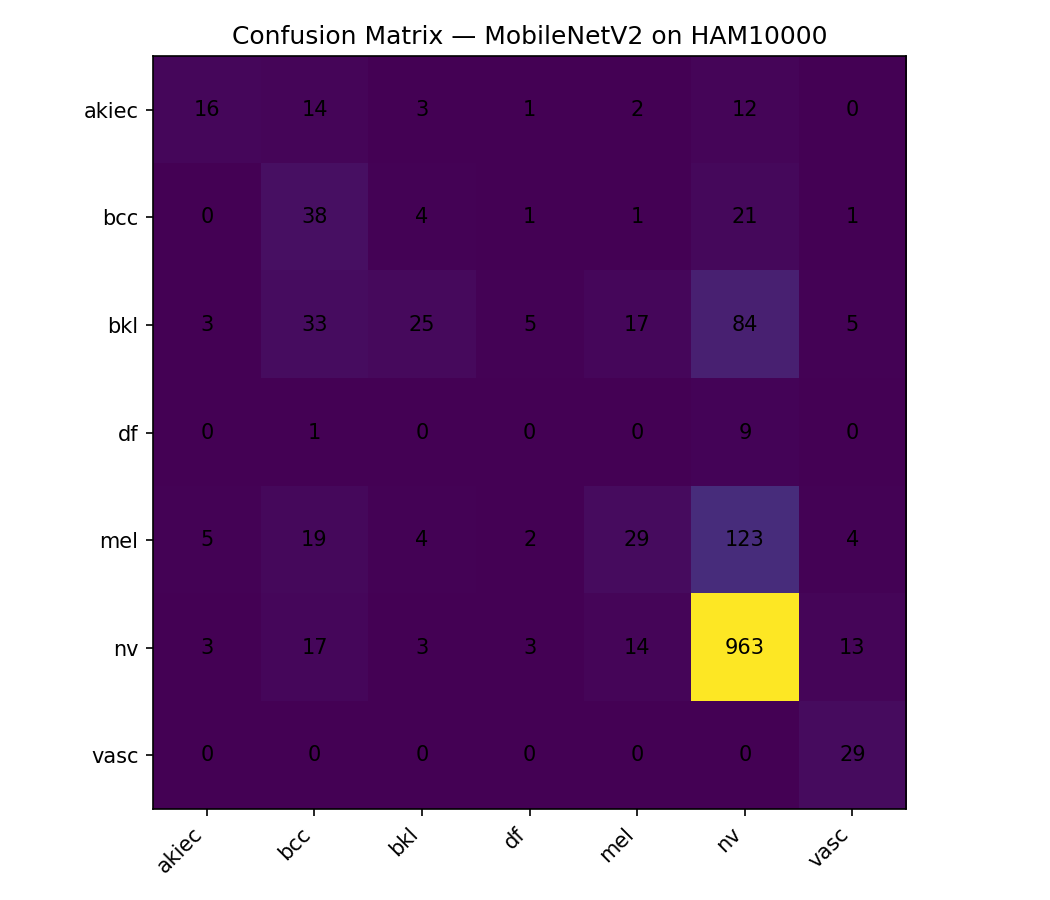

In [30]:
%cd /content/Deep-Learning-Project
!python members/run_mobilenet_v2.py --data_dir /content/data --eval --batch_size 32

# (optional) preview the confusion matrix image in Colab
from IPython.display import Image, display
display(Image("results/m3_confusion_matrix.png"))


In [31]:
%cd /content/Deep-Learning-Project

import json, csv, os, time

report_path = "results/m3_test_report.json"
with open(report_path) as f:
    rep = json.load(f)

row = [
    "M3_MobileNetV2_strongAug",           # run name
    float(rep["accuracy"]),               # overall accuracy
    float(rep["macro avg"]["precision"]),
    float(rep["macro avg"]["recall"]),
    float(rep["macro avg"]["f1-score"]),
    time.strftime("%Y-%m-%d %H:%M")
]

csv_path = "results/summary.csv"
if not os.path.exists(csv_path):
    with open(csv_path, "w", newline="") as f:
        csv.writer(f).writerow(
            ["run","accuracy","macro_precision","macro_recall","macro_f1","timestamp"]
        )

with open(csv_path, "a", newline="") as f:
    csv.writer(f).writerow(row)

print("Wrote:", csv_path)
!tail -n +1 results/summary.csv | sed -n '1,20p'


/content/Deep-Learning-Project
Wrote: results/summary.csv
run,accuracy,macro_precision,macro_recall,macro_f1,timestamp
M3_MobileNetV2_strongAug,0.7203667321545514,0.47966540955851605,0.4511697672091609,0.41161747768317386,2025-10-07 08:50


In [ ]:
from getpass import getpass
token = getpass("GitHub Personal Access Token (will not be saved): ")
!git remote set-url origin https://{token}@github.com/<org-or-user>/<repo>.git
# later, after you add files:
# !git add -A && git commit -m "M3: MobileNetV2 baseline" && git push -u origin model-m3-mobilenetv2


In [34]:
%cd /content/Deep-Learning-Project

# 1) Create/update .gitignore (avoid huge/local stuff)
gitignore = """\
__pycache__/
.ipynb_checkpoints/
.DS_Store

# Local-only paths/files
/content/
data/
*.zip
.kaggle/
weights/
"""
with open(".gitignore","w") as f:
    f.write(gitignore)

# 2) Stage code + small result artifacts
!git add members/run_mobilenet_v2.py .gitignore
!git add results/m3_*.csv results/m3_*.json results/*.png

# 3) Commit
!git commit -m "M3: MobileNetV2 (HAM10000) — splits, strong aug tf.data, 2-stage fine-tune, eval + logs"

# 4) Push (enter your GitHub PAT when asked; it won't be saved)
from getpass import getpass
token = getpass("GitHub token (repo scope): ")

import subprocess, shlex
origin = subprocess.check_output(shlex.split("git config --get remote.origin.url")).decode().strip()

# Rebuild remote URL with token (handles https and git@ forms)
if origin.startswith("https://"):
    secure_origin = origin.replace("https://", f"https://{token}@")
elif origin.startswith("http://"):
    secure_origin = origin.replace("http://", f"http://{token}@")
else:
    # e.g. git@github.com:org/repo.git -> https://github.com/org/repo.git
    path = origin.split(":", 1)[-1]
    secure_origin = f"https://{token}@github.com/{path}"

!git remote set-url origin "{secure_origin}"
!git push -u origin sathmi


SyntaxError: invalid syntax (ipython-input-2441833265.py, line 37)